In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021-01-05T17:00:00,6,Friuli Venezia Giulia,657,59,716,11078,11794,101,688,...,41.0,7105.0,1680.0,111.0,8.24,6.07,9.68,40.95,-6.35,0.86
316,2021-01-06T17:00:00,6,Friuli Venezia Giulia,649,62,711,11119,11830,36,606,...,33.0,6380.0,1403.0,41.0,8.72,6.01,9.50,43.19,5.08,0.31
317,2021-01-07T17:00:00,6,Friuli Venezia Giulia,661,64,725,11640,12365,535,671,...,29.0,6145.0,1792.0,521.0,8.83,5.86,10.92,37.44,3.23,4.52
318,2021-01-08T17:00:00,6,Friuli Venezia Giulia,671,64,735,11841,12576,211,633,...,28.0,6437.0,1453.0,201.0,8.71,5.84,9.83,43.57,0.00,1.71


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1015
Nuovi tamponi: 8424.0
Percentuale nuovi positivi/nuovi tamponi: 12.0 %
Nuovi guariti: 687.0
Nuovi deceduti: 14.0
Variazione positivi ricoverati con sintomi: 19.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 297.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,6,Friuli Venezia Giulia,336,47,383,7458,7841,9,482,...,20.0,6438.0,1775.0,-9.0,12.27,4.88,7.49,27.15,2.17,0.11
1,2020-11-11T17:00:00,6,Friuli Venezia Giulia,346,46,392,7773,8165,324,572,...,13.0,6171.0,1641.0,315.0,11.73,4.80,9.27,34.86,-2.13,4.13
2,2020-11-12T17:00:00,6,Friuli Venezia Giulia,346,47,393,8254,8647,482,838,...,9.0,7529.0,2141.0,481.0,11.96,4.54,11.13,39.14,2.17,5.90
3,2020-11-13T17:00:00,6,Friuli Venezia Giulia,366,47,413,8738,9151,504,831,...,8.0,7121.0,1996.0,484.0,11.38,4.51,11.67,41.63,0.00,5.83
4,2020-11-14T17:00:00,6,Friuli Venezia Giulia,378,45,423,9106,9529,378,558,...,10.0,5271.0,1290.0,368.0,10.64,4.44,10.59,43.26,-4.26,4.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-05T17:00:00,6,Friuli Venezia Giulia,657,59,716,11078,11794,101,688,...,41.0,7105.0,1680.0,111.0,8.24,6.07,9.68,40.95,-6.35,0.86
57,2021-01-06T17:00:00,6,Friuli Venezia Giulia,649,62,711,11119,11830,36,606,...,33.0,6380.0,1403.0,41.0,8.72,6.01,9.50,43.19,5.08,0.31
58,2021-01-07T17:00:00,6,Friuli Venezia Giulia,661,64,725,11640,12365,535,671,...,29.0,6145.0,1792.0,521.0,8.83,5.86,10.92,37.44,3.23,4.52
59,2021-01-08T17:00:00,6,Friuli Venezia Giulia,671,64,735,11841,12576,211,633,...,28.0,6437.0,1453.0,201.0,8.71,5.84,9.83,43.57,0.00,1.71


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

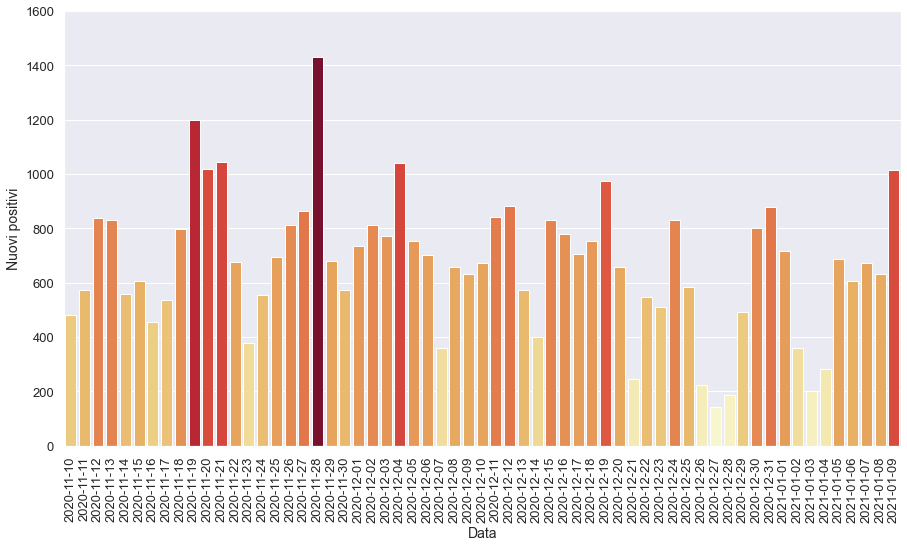

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

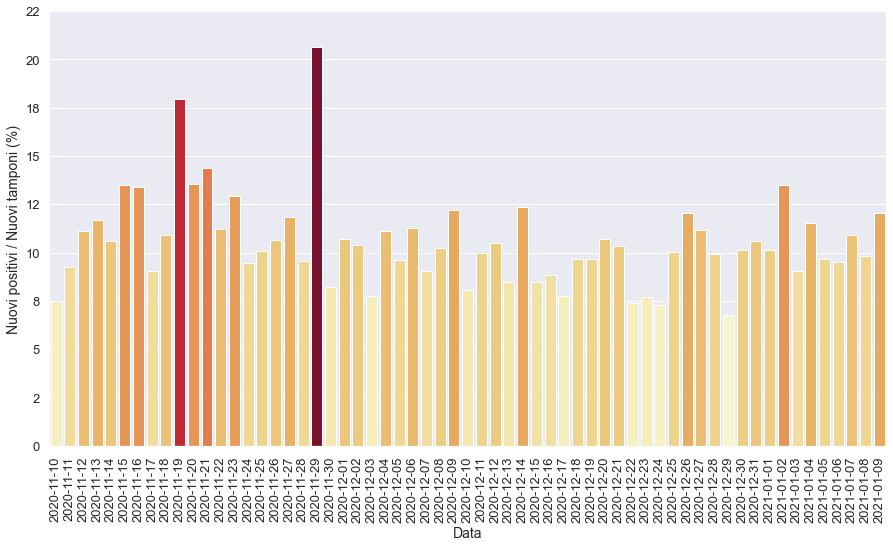

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

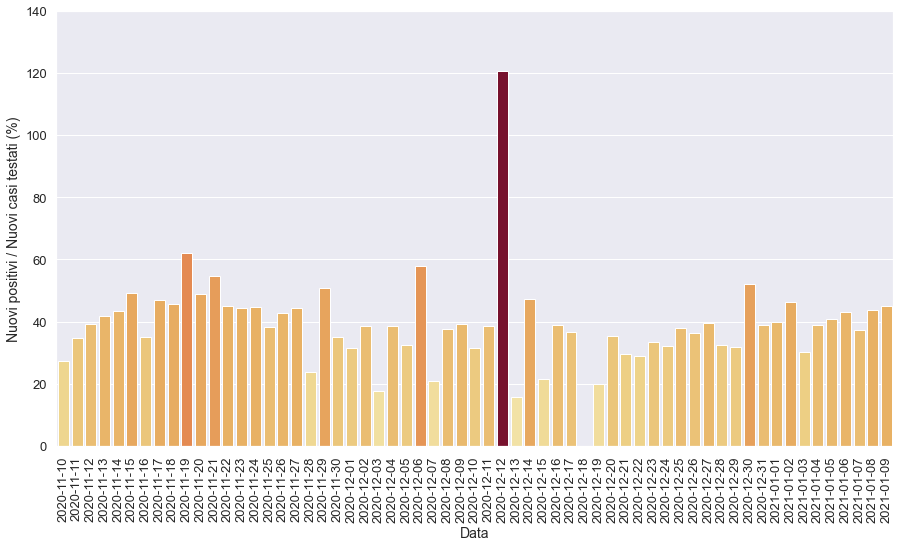

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

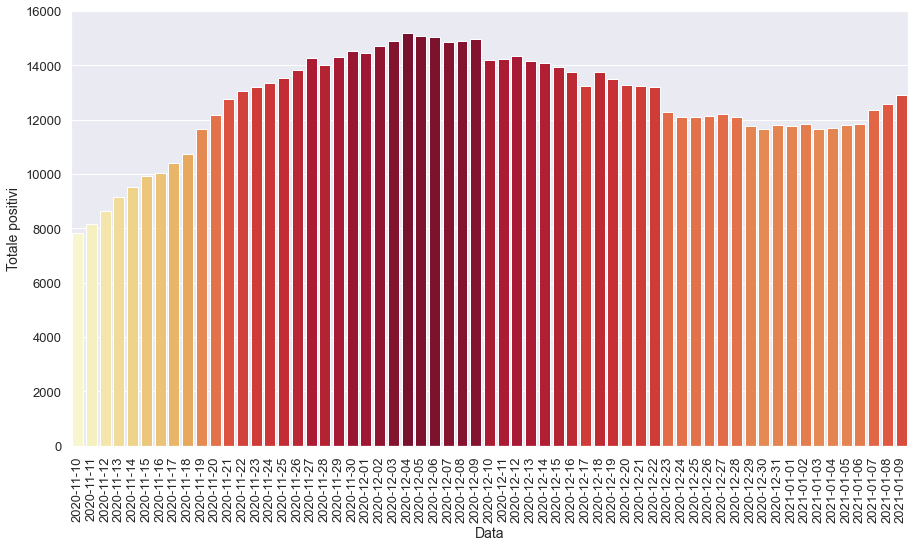

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

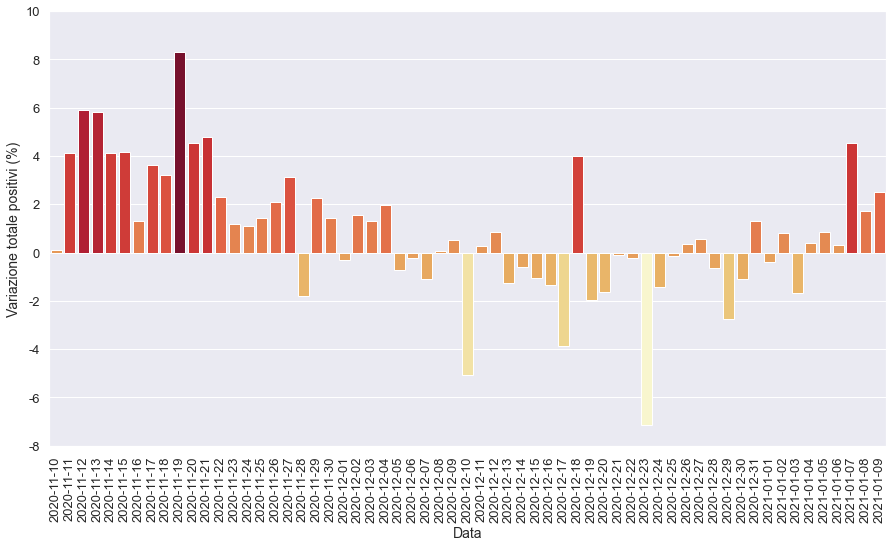

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

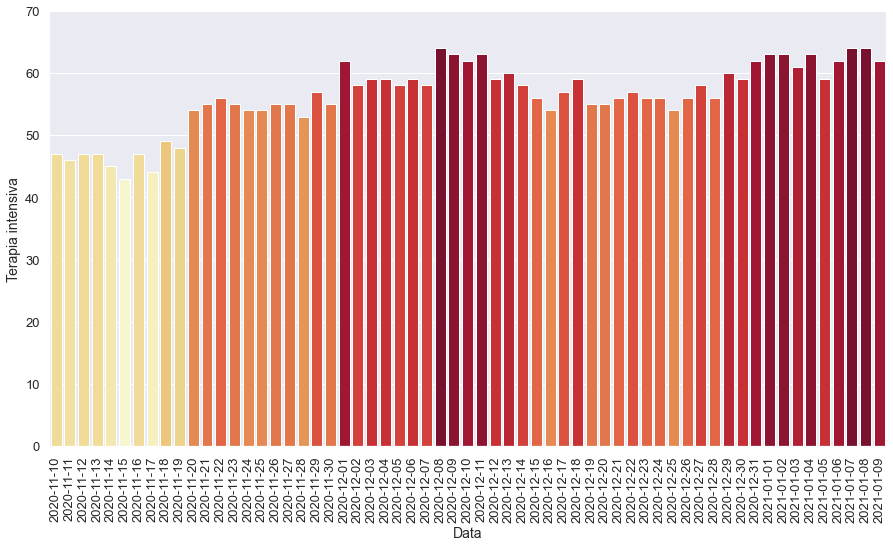

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

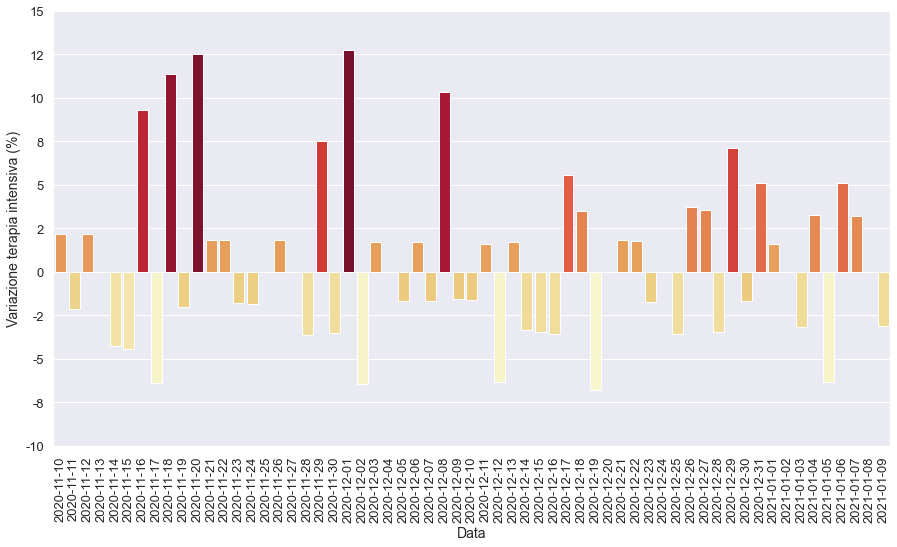

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

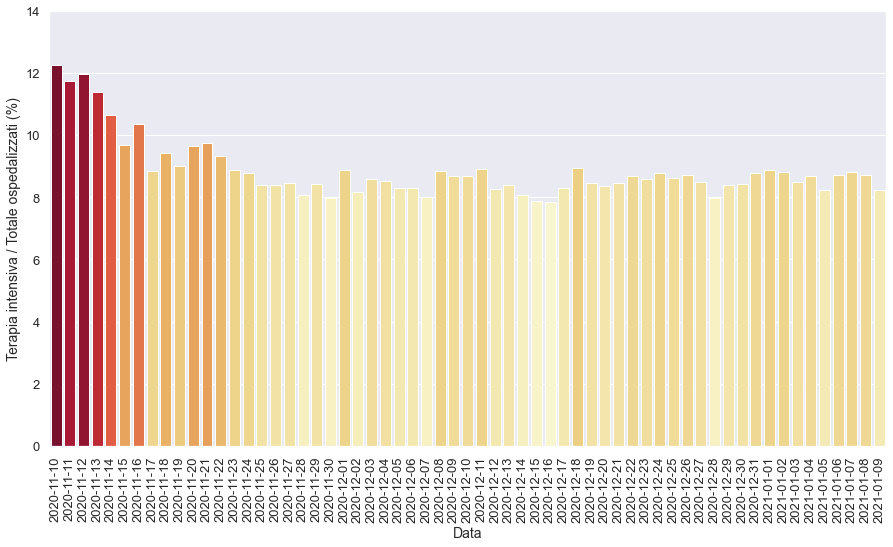

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

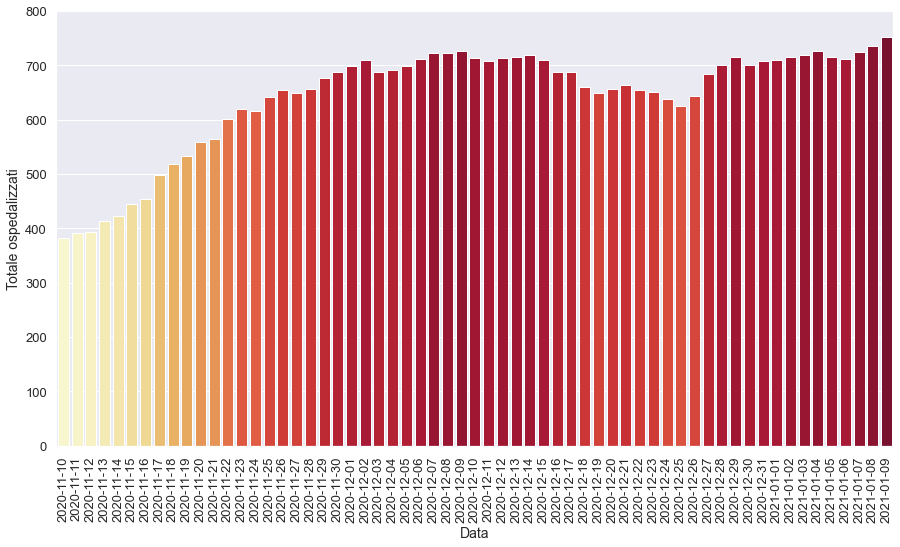

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

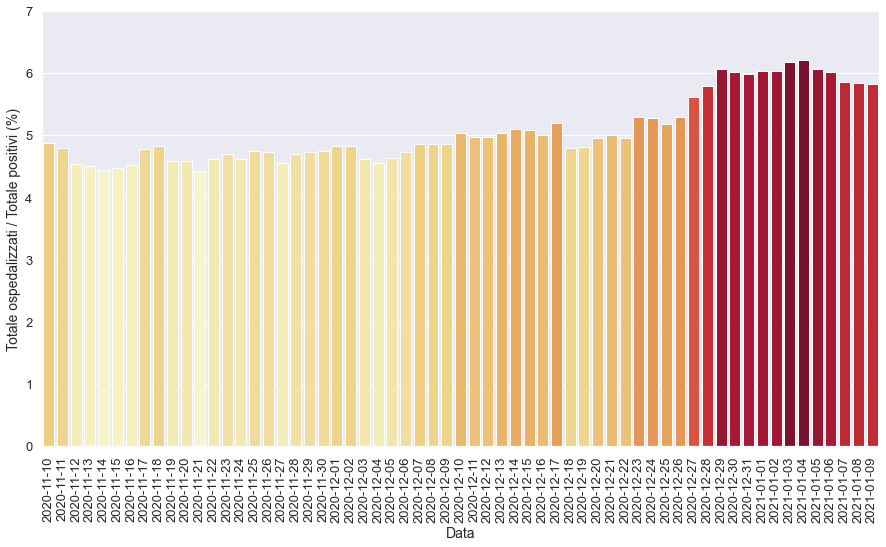

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

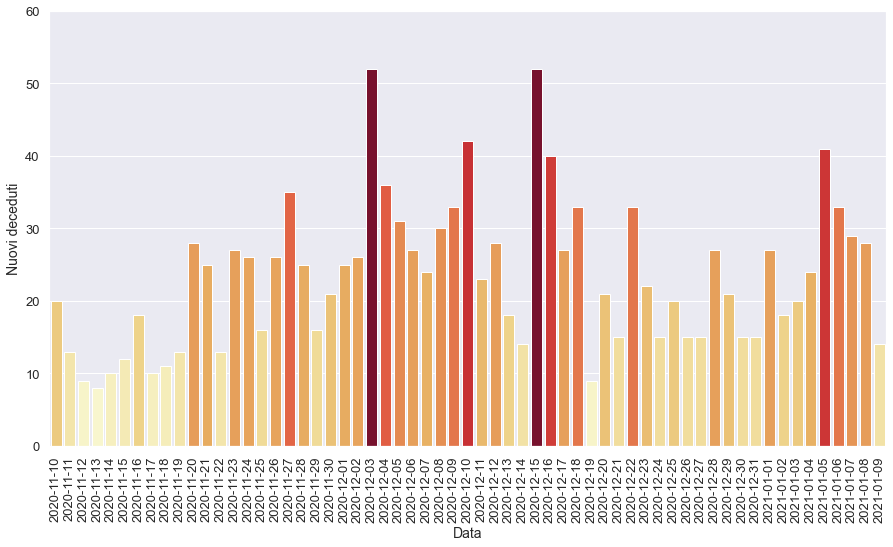

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

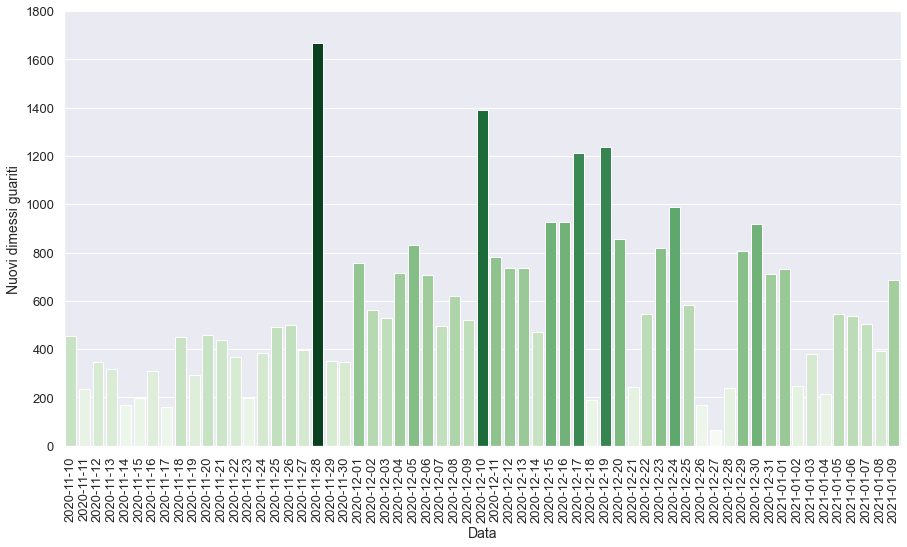

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-10T17:00:00,6,Friuli Venezia Giulia,652,62,714,13481,14195,-760,672,...,42.0,8356.0,2136.0,-748.0,8.68,5.03,8.04,31.46,-1.59,-5.08
1,2020-12-11T17:00:00,6,Friuli Venezia Giulia,644,63,707,13528,14235,40,843,...,23.0,8432.0,2182.0,47.0,8.91,4.97,10.00,38.63,1.61,0.28
2,2020-12-12T17:00:00,6,Friuli Venezia Giulia,654,59,713,13642,14355,120,884,...,28.0,8444.0,732.0,114.0,8.27,4.97,10.47,120.77,-6.35,0.84
3,2020-12-13T17:00:00,6,Friuli Venezia Giulia,655,60,715,13458,14173,-182,573,...,18.0,6785.0,3618.0,-184.0,8.39,5.04,8.45,15.84,1.69,-1.27
4,2020-12-14T17:00:00,6,Friuli Venezia Giulia,660,58,718,13370,14088,-85,402,...,14.0,3253.0,849.0,-88.0,8.08,5.10,12.36,47.35,-3.33,-0.60
5,2020-12-15T17:00:00,6,Friuli Venezia Giulia,654,56,710,13229,13939,-149,829,...,52.0,9766.0,3845.0,-141.0,7.89,5.09,8.49,21.56,-3.45,-1.06
6,2020-12-16T17:00:00,6,Friuli Venezia Giulia,634,54,688,13063,13751,-188,779,...,40.0,8826.0,2002.0,-166.0,7.85,5.00,8.83,38.91,-3.57,-1.35
7,2020-12-17T17:00:00,6,Friuli Venezia Giulia,630,57,687,12534,13221,-530,707,...,27.0,9096.0,1938.0,-529.0,8.30,5.20,7.77,36.48,5.56,-3.85
8,2020-12-18T17:00:00,6,Friuli Venezia Giulia,601,59,660,13091,13751,530,753,...,33.0,7781.0,0.0,557.0,8.94,4.80,9.68,0.00,3.51,4.01
9,2020-12-19T17:00:00,6,Friuli Venezia Giulia,594,55,649,12831,13480,-271,974,...,9.0,10096.0,4865.0,-260.0,8.47,4.81,9.65,20.02,-6.78,-1.97


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

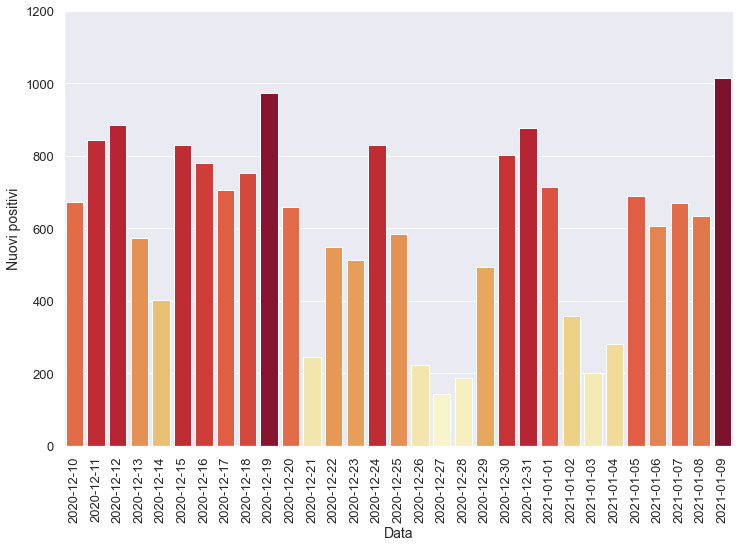

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

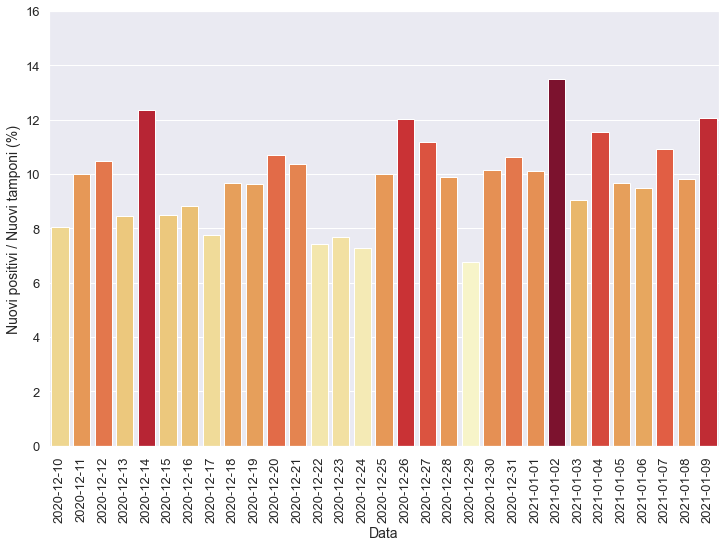

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

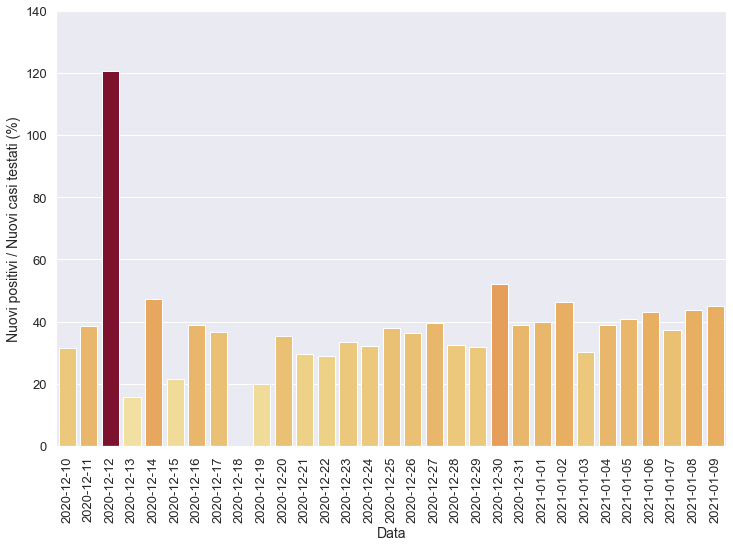

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

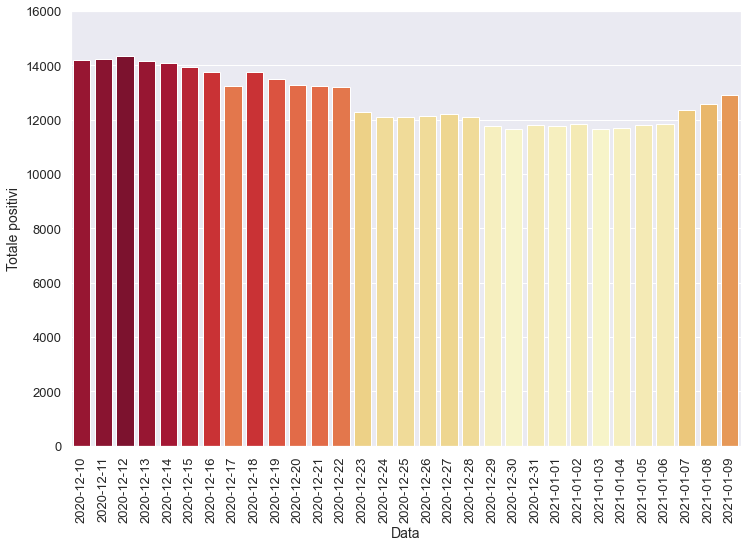

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

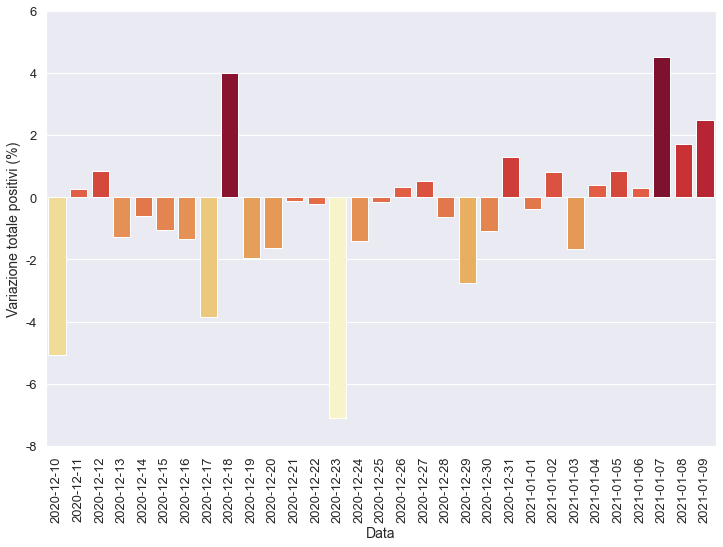

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

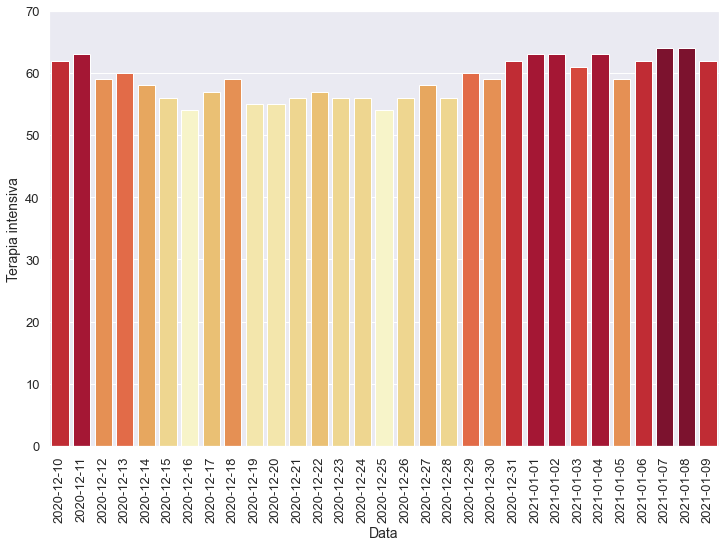

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

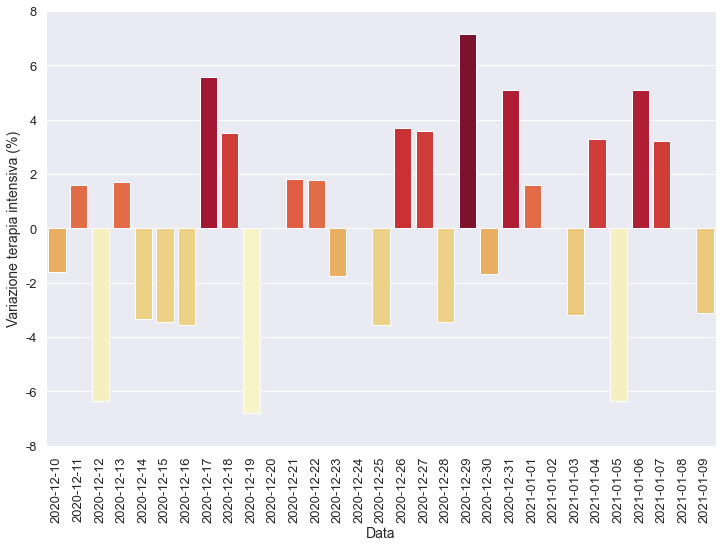

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

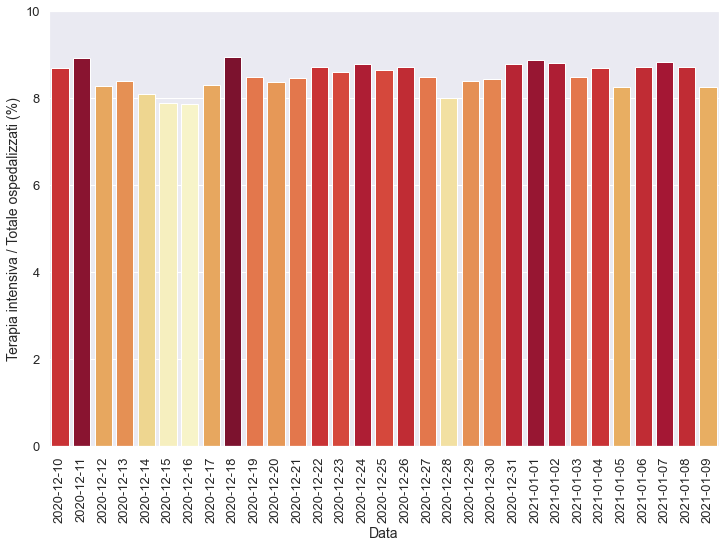

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

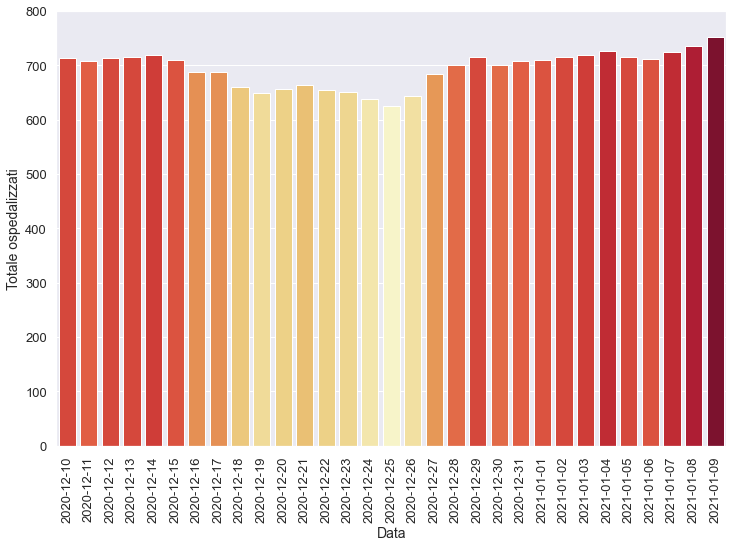

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

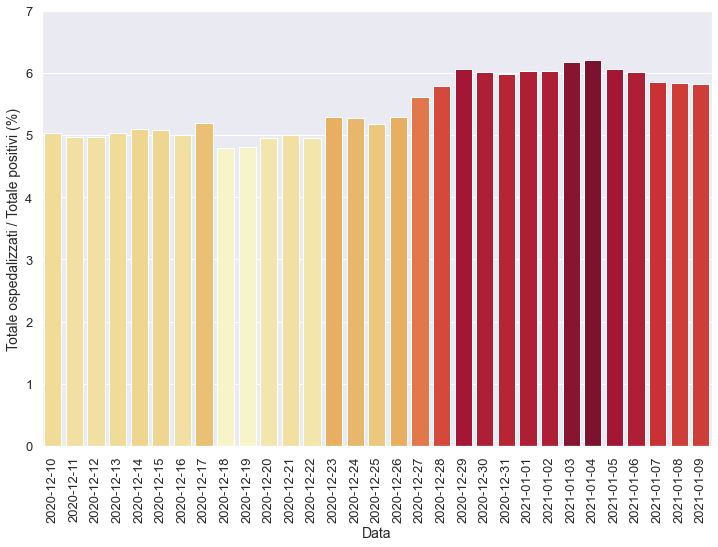

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

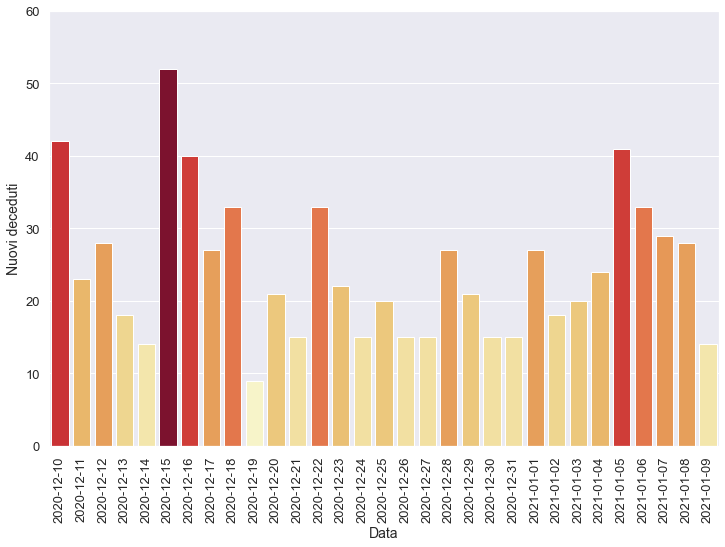

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

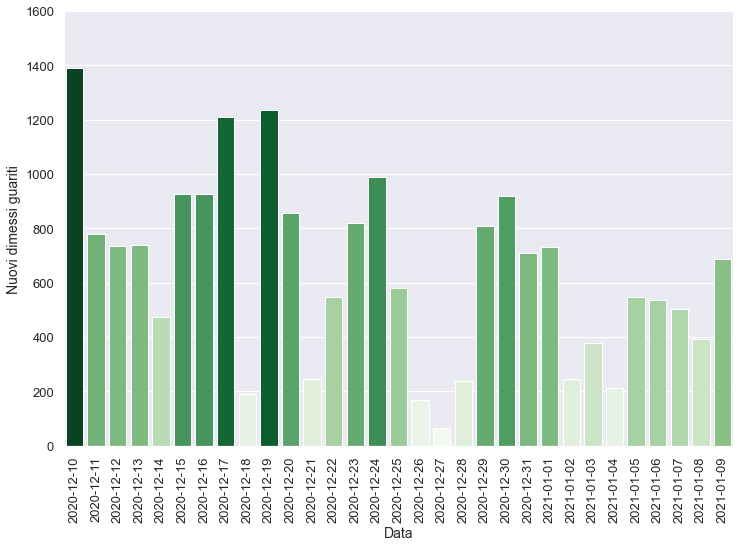

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-02T17:00:00,6,Friuli Venezia Giulia,652,63,715,11132,11847,94,359,...,18.0,2657.0,776.0,89.0,8.81,6.04,13.51,46.26,0.00,0.80
1,2021-01-03T17:00:00,6,Friuli Venezia Giulia,658,61,719,10930,11649,-198,200,...,20.0,2211.0,659.0,-202.0,8.48,6.17,9.05,30.35,-3.17,-1.67
2,2021-01-04T17:00:00,6,Friuli Venezia Giulia,663,63,726,10967,11693,44,281,...,24.0,2438.0,723.0,37.0,8.68,6.21,11.53,38.87,3.28,0.38
3,2021-01-05T17:00:00,6,Friuli Venezia Giulia,657,59,716,11078,11794,101,688,...,41.0,7105.0,1680.0,111.0,8.24,6.07,9.68,40.95,-6.35,0.86
4,2021-01-06T17:00:00,6,Friuli Venezia Giulia,649,62,711,11119,11830,36,606,...,33.0,6380.0,1403.0,41.0,8.72,6.01,9.50,43.19,5.08,0.31
5,2021-01-07T17:00:00,6,Friuli Venezia Giulia,661,64,725,11640,12365,535,671,...,29.0,6145.0,1792.0,521.0,8.83,5.86,10.92,37.44,3.23,4.52
6,2021-01-08T17:00:00,6,Friuli Venezia Giulia,671,64,735,11841,12576,211,633,...,28.0,6437.0,1453.0,201.0,8.71,5.84,9.83,43.57,0.00,1.71
7,2021-01-09T17:00:00,6,Friuli Venezia Giulia,690,62,752,12138,12890,314,1015,...,14.0,8424.0,2260.0,297.0,8.24,5.83,12.05,44.91,-3.12,2.50


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

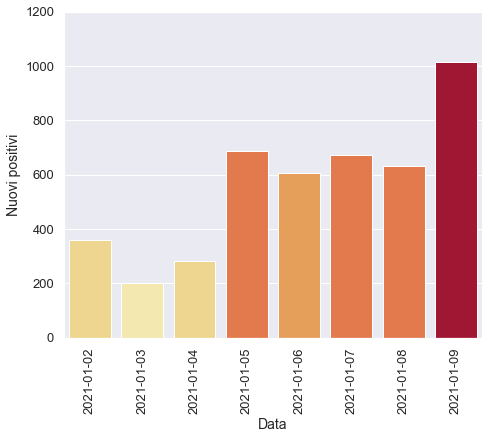

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

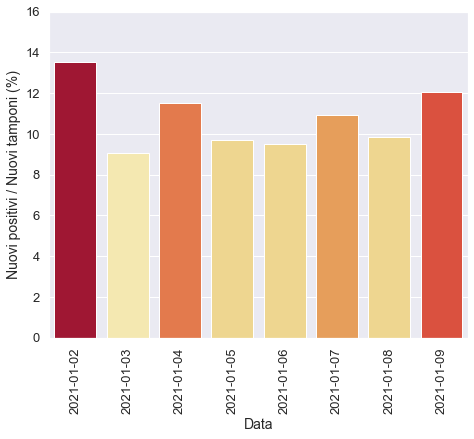

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

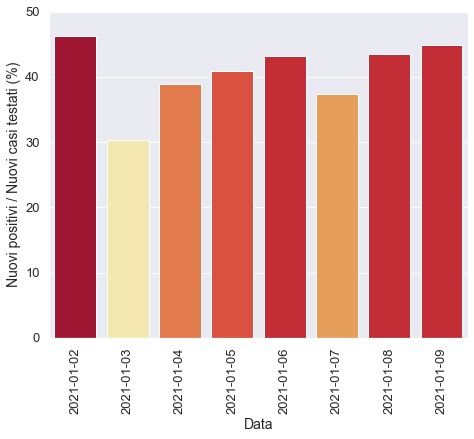

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

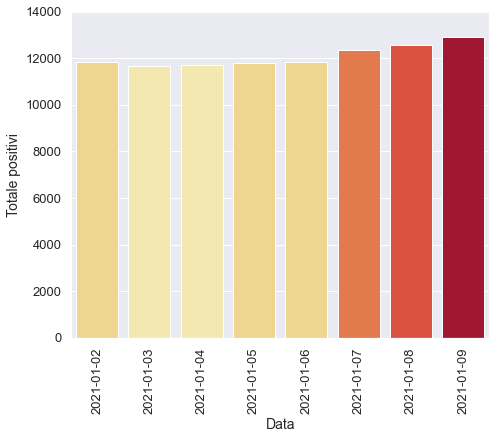

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

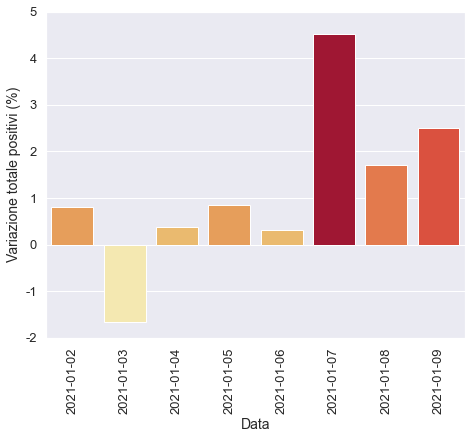

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

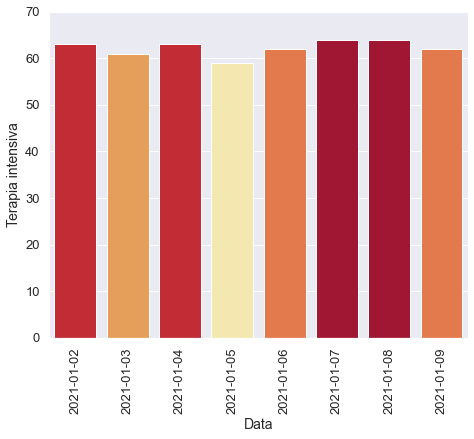

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

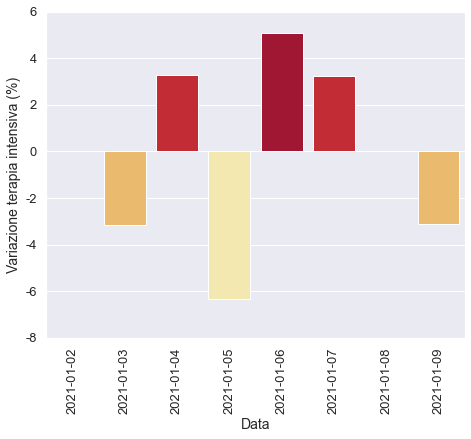

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

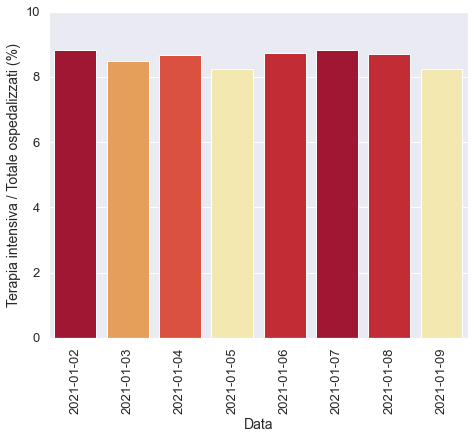

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

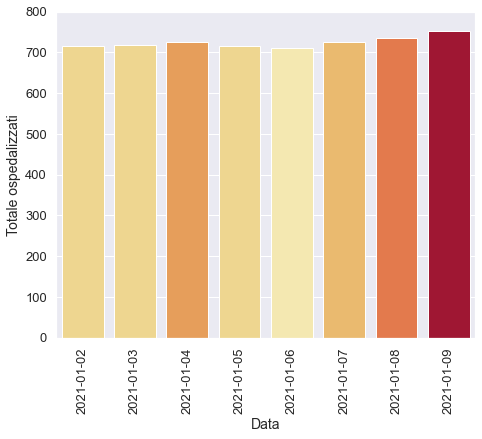

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

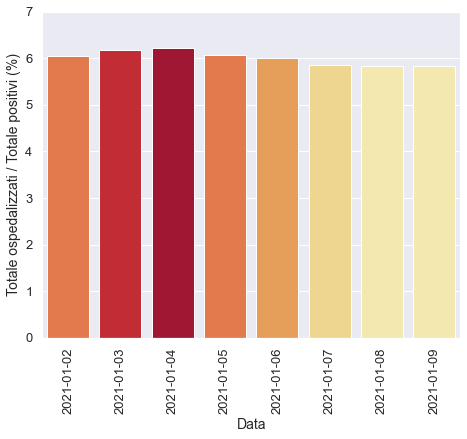

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

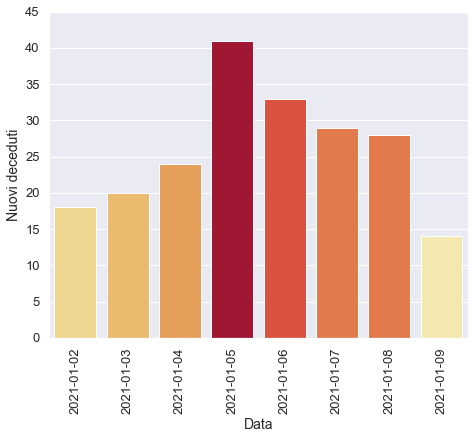

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

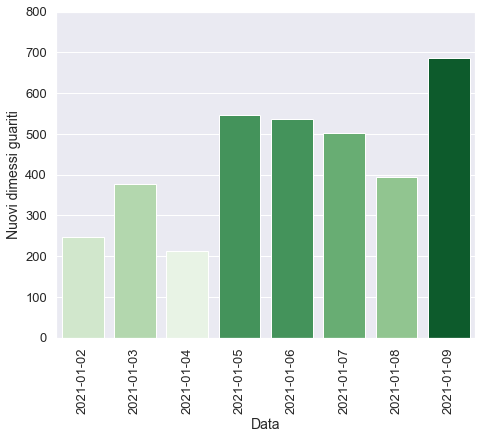

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)